## **Classify Statue of Liberty or Eiffel Tower**

**Image Classifier Based on Custom Dataset**

In [0]:
!mkdir eiffel

In [0]:
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

In [0]:
download_images('eiffel.txt', 'eiffel/', max_pics=200)

In [0]:
download_images('statue.txt', 'statue/', max_pics=200)

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path='../content/dataset/'
classes=['eiffel','statue']

In [0]:
# for c in classes:
#     print(c)
verify_images('../content/dataset/eiffel', delete=True, max_size=500)
verify_images('../content/dataset/statue', delete=True, max_size=500)

cannot identify image file <_io.BufferedReader name='../content/dataset/eiffel/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/eiffel/00000199.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/eiffel/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/eiffel/00000076.jpeg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


cannot identify image file <_io.BufferedReader name='../content/dataset/statue/00000186.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/statue/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/statue/00000061.jpg'>
cannot identify image file <_io.BufferedReader name='../content/dataset/statue/00000027.jpg'>


In [0]:
%cd /content

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('../content/dataset/', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0,classes=classes).normalize(imagenet_stats)

In [0]:
data.classes

['eiffel', 'statue']

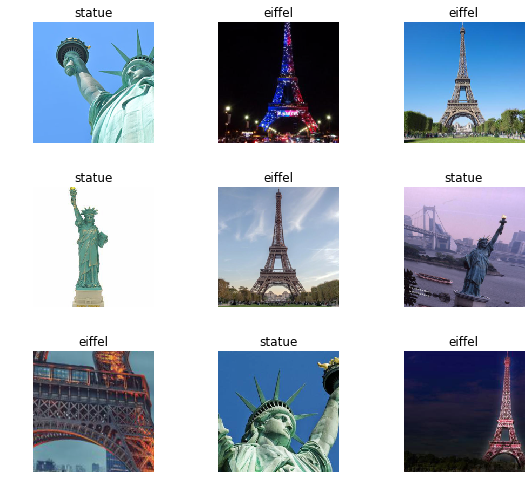

In [0]:
data.show_batch(rows=3, figsize=(8,7))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.351777,0.050786,0.012821,00:05
1,0.179011,0.026061,0.012821,00:05
2,0.133120,0.007763,0.000000,00:05


In [0]:
impath='../content/devtest/e2.jpg'

img=open_image(impath)
ans=learn.predict(img)
print(ans)
m=max(ans[2])
print(f'Percentage:{m*100}')

(Category eiffel, tensor(0), tensor([1.0000e+00, 9.9840e-07]))
Percentage:99.99990844726562


	
 Prediction: eiffel 	
 Accuracy: 99.99990844726562 %


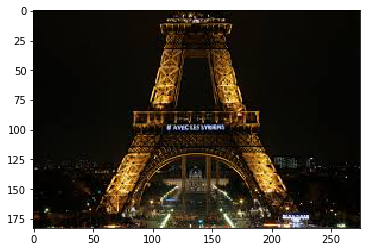

In [0]:
from PIL import *
img = Image.open(impath)
plt.imshow(img) 
print(f'\t\n Prediction: {ans[0]} \t\n Accuracy: {m*100} %')

In [0]:
info=ClassificationInterpretation.from_learner(learn)
loss,idxs=info.top_losses()

In [0]:
loss,idxs=i2.top_losses()

In [0]:
arr=os.listdir('../content/devtest/')
for a in arr:
  print(a)

s2.jpg
e1.jpg
s1.jpg
e2.jpg
s3.jpg


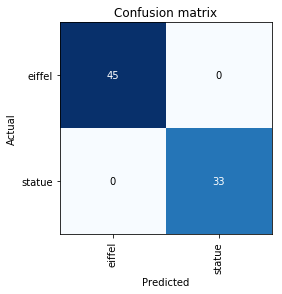

In [0]:
info.plot_confusion_matrix()

In [0]:
learn.save('eiffel-1')

In [0]:
learn.load('eiffel-1')

Learner(data=ImageDataBunch;

Train: LabelList (312 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
eiffel,eiffel,eiffel,eiffel,eiffel
Path: ../content/dataset;

Valid: LabelList (78 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
eiffel,eiffel,eiffel,statue,statue
Path: ../content/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin